### 控制方程
$$
\frac{\partial^2 T}{\partial x^2} = \frac{hP}{\lambda A_c}(T-T_{\infty})=H(T-T_{\infty})
$$

### 构建离散方程

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
L = 1
n = 6
x = np.linspace(0, L, n)
dx = x[1] - x[0]

H = 0.1
Tleft = 200
Tright = 300
Tinf = 500

In [19]:
# np.ones()
ud = np.ones(n-1)
ud[0] = 0

ld = np.ones(n-1)
ld[-1] = 0

md = np.ones(n) * (-(2 + H*dx*dx))
md[0] = md[-1] = 1

# diag()
A = np.diag(md, 0) + np.diag(ud, 1) + np.diag(ld, -1)

[[ 1.     0.     0.     0.     0.     0.   ]
 [ 1.    -2.004  1.     0.     0.     0.   ]
 [ 0.     1.    -2.004  1.     0.     0.   ]
 [ 0.     0.     1.    -2.004  1.     0.   ]
 [ 0.     0.     0.     1.    -2.004  1.   ]
 [ 0.     0.     0.     0.     0.     1.   ]]


In [21]:
source = -H*dx*dx*Tinf*np.ones(n)
source[0] = 200
source[-1] = 300
print(source)

[200.  -2.  -2.  -2.  -2. 300.]


In [22]:
sol = np.linalg.solve(A, source)

In [23]:
print(sol)

[200.         222.05998248 243.0082049  262.92846013 281.90042921
 300.        ]


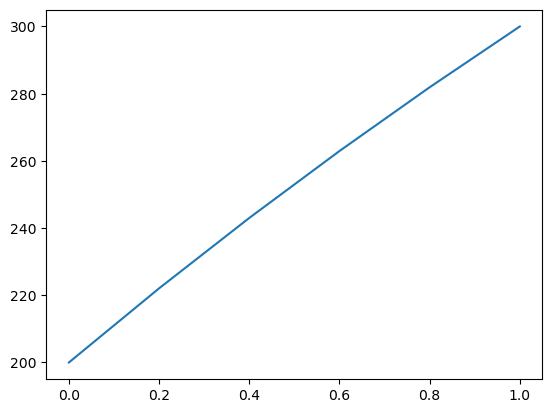

In [24]:
plt.plot(x, sol)